In [37]:
from __future__ import division, print_function

In [38]:
import pynamd as nd
from pprint import pprint as pp

#draw graphs
%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

import seaborn as sns
import pandas as pd

In [39]:
l = nd.NamdLog("00001.log", "00002.log")

In [40]:
l.info

{'outputname': 'out/11-run-wat/00001', 'cutoff': 12.0, '1-4scaling': 1.0, 'paraTypeCharmm': True, 'rigidBonds': 'ALL', 'timestep': 2.0, 'extendedSystem': 'out/10-min-wat/00001.restart.xsc', 'PMETolerance': 1e-06, 'langevinHydrogen': False, 'langevinPistonDecay': 100.0, 'wrapAll': True, 'seed': 1437084372, 'coordinates': 'struct/water.pdb', 'pairlistdist': 14.0, 'exclude': 'scaled1-4', 'langevinPistonTemp': 300.0, 'fullElectFrequency': 2, 'cellBasisVector1': [79.8666, 0.0, 0.0], 'langevinTemp': 300.0, 'cellBasisVector2': [0.0, 76.0176, 0.0], 'parameters': ['FF/par_all22_prot.prm', 'FF/par_all36_lipid.prm', 'FF/par_all27_water.prm'], 'useFlexibleCell': False, 'stepsPerCycle': 20, 'langevin': True, 'switchdist': 10.0, 'PME': True, 'useSettle': True, 'outputTiming': 25000, 'switching': True, 'binVelocities': 'out/10-min-wat/00001.restart.vel', 'rigidTolerance': 1e-05, 'langevinDamping': 1.0, 'binCoordinates': 'out/10-min-wat/00001.restart.coor', 'DCDFreq': 2500, 'PMEInterpOrder': 4, 'lange

In [41]:
lf = pd.DataFrame(l.energy)

In [42]:
#convert time to nanoseconds
outputEnergies_ns = l.info['outputEnergies']*l.info['timestep']/1000/1000
lf['t [ns]']=lf.index*outputEnergies_ns

mean = lf["TOTAL"].mean()
lf["TOTAL_rolling"] = lf["TOTAL"].rolling(window=20,center=True).mean()

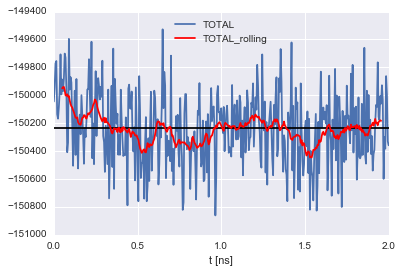

In [43]:
ax = lf.plot(x='t [ns]', y='TOTAL')
ax.axhline(mean, color='black', label="TOTAL mean")
lf.plot(x='t [ns]', y='TOTAL_rolling', ax=ax, color='red')